# Volume Meshing

Stellarmesh also supports unstructured volume meshes generated with Gmsh.

In [1]:
import tempfile

import build123d as bd
from IPython.display import Image

import stellarmesh as sm

/home/alex/Programming/stellarmesh/.pixi/envs/build123d/lib/python3.11/site-packages/pymoab/__init__.py:21: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
def render_mesh(mesh: sm.Mesh):
    """Render a Stellarmesh mesh to the notebook output."""
    with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp_file:
        mesh.render(tmp_file.name, rotation_xyz=(90, 0, -90), normals=0, clipping=True)
        display(Image(tmp_file.name, width=800))

In [3]:
def build_torus_geometry():
    """Render a Stellarmesh mesh to the notebook output."""
    solids = [bd.Solid.make_torus(10, 1)]
    for _ in range(2):
        solids.append(bd.thicken(solids[-1].faces()[0], 1))
    solids = solids[1:]
    return sm.Geometry(solids, material_names=["a", "b"])

## Volume meshing with Gmsh

Volume meshes are created using the [VolumeMesh](../../api/generated/stellarmesh.VolumeMesh.rst) class. The mesh is configured using the [GmshVolumeOptions](../../api/generated/stellarmesh.GmshVolumeOptions.rst) options class.

*Note: the overlaps seen in the below render are visual artifacts.*

X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


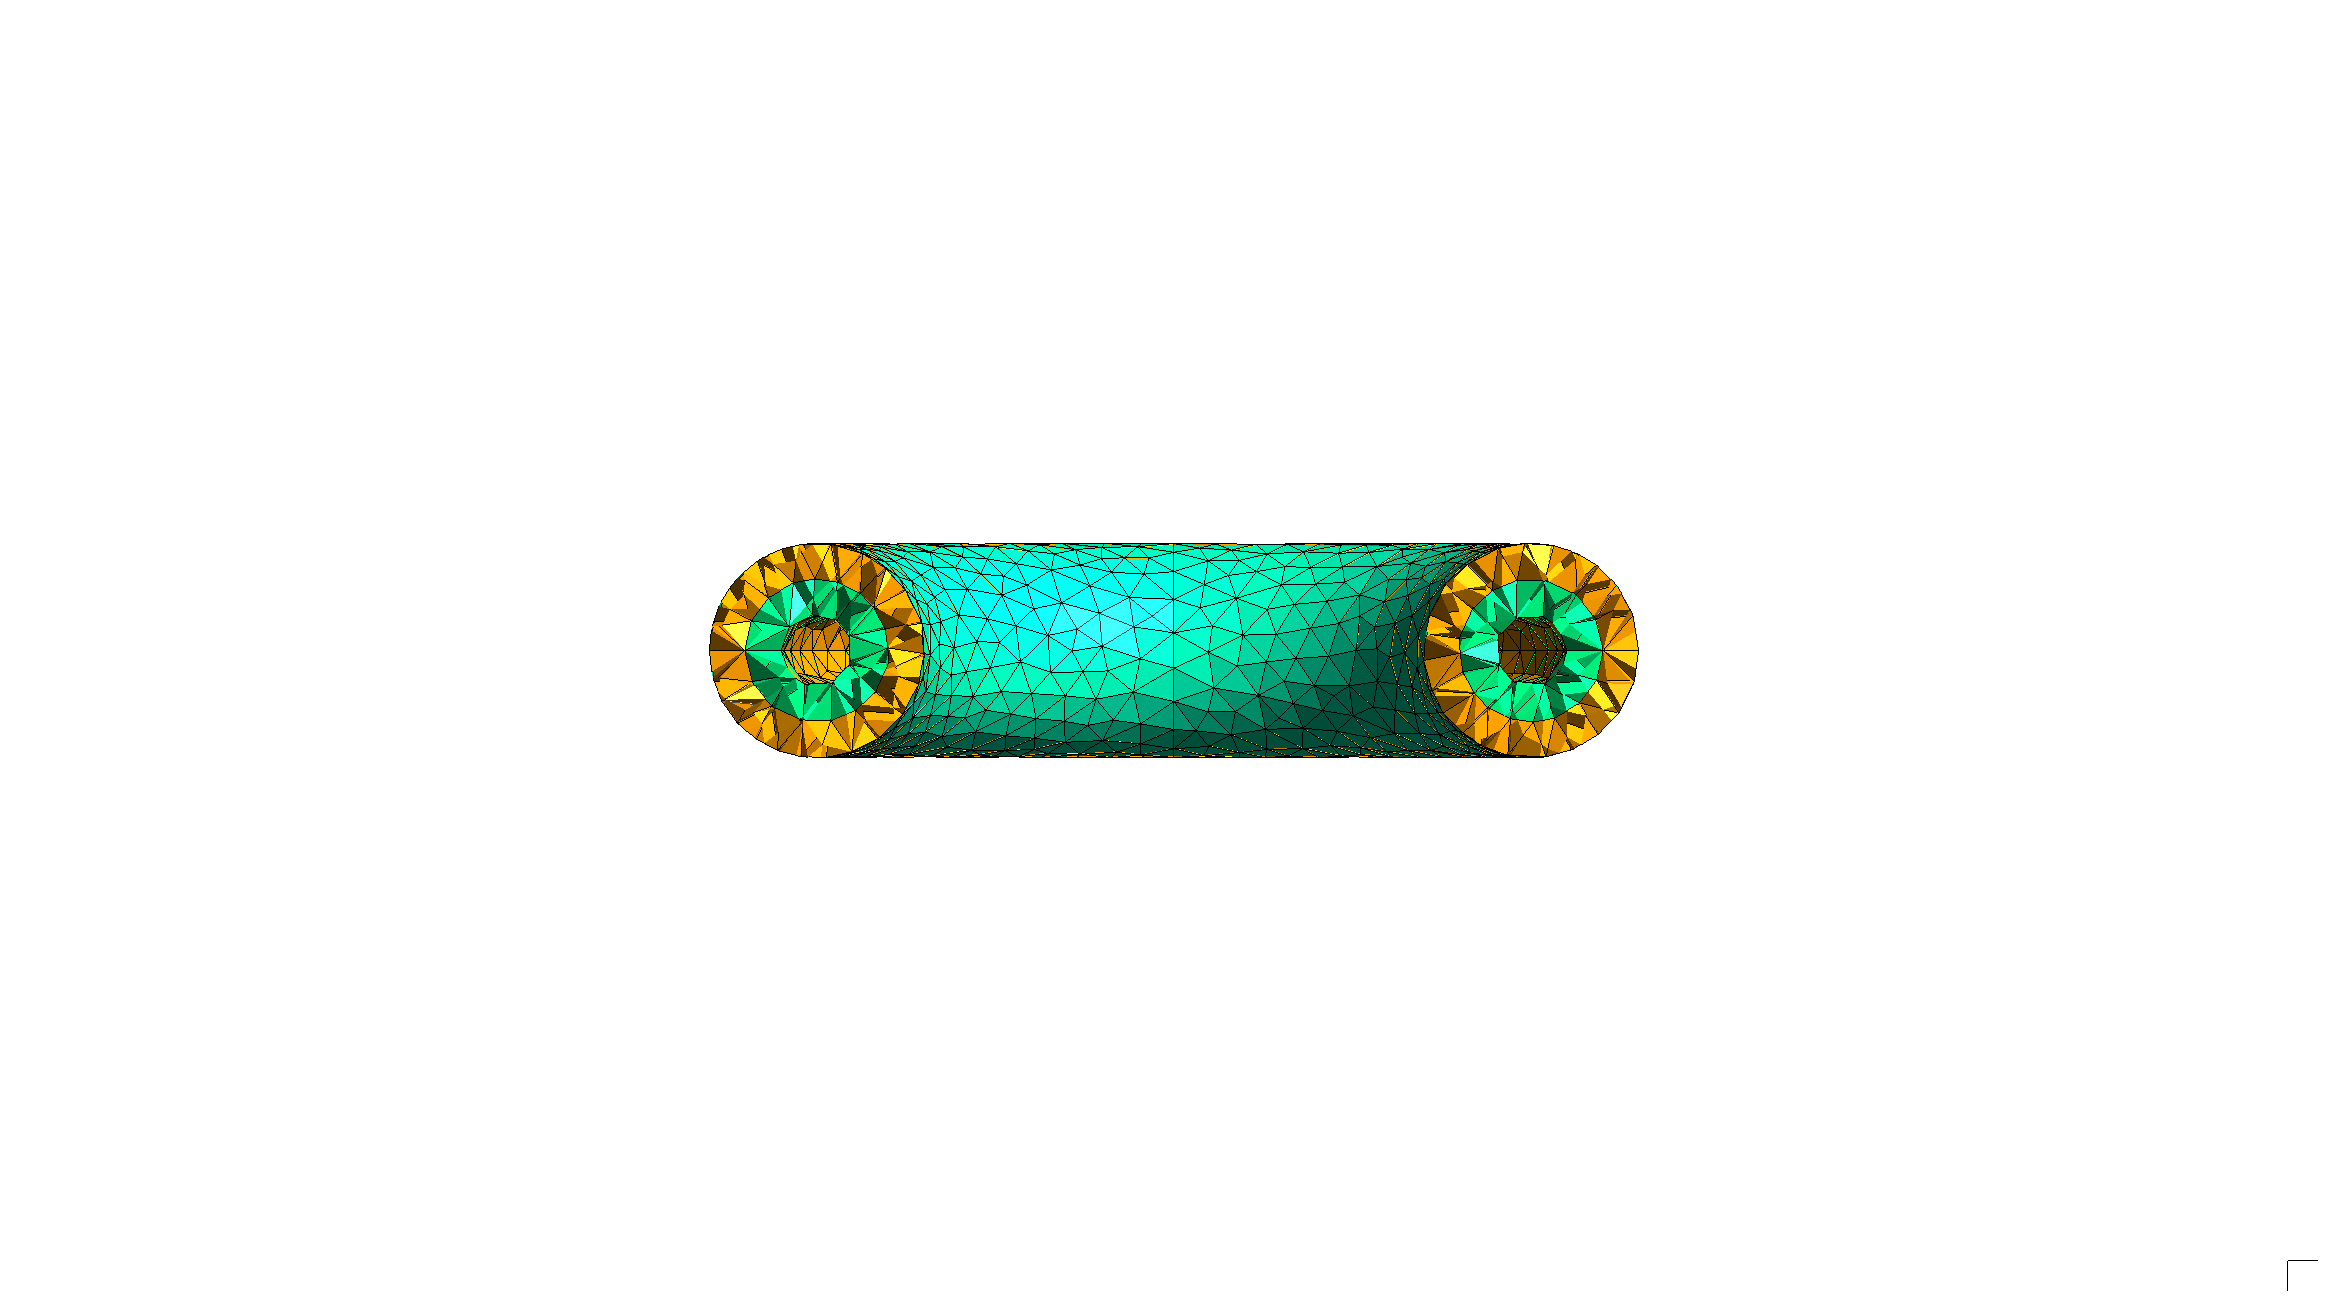

In [4]:
geometry = build_torus_geometry()
options = sm.GmshVolumeOptions(max_mesh_size=1)
mesh = sm.VolumeMesh.from_geometry(geometry, options)
render_mesh(mesh)

The mesh can be configured using many of the same options as [GmshSurfaceOptions](../../api/generated/stellarmesh.GmshSurfaceOptions.rst).

X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


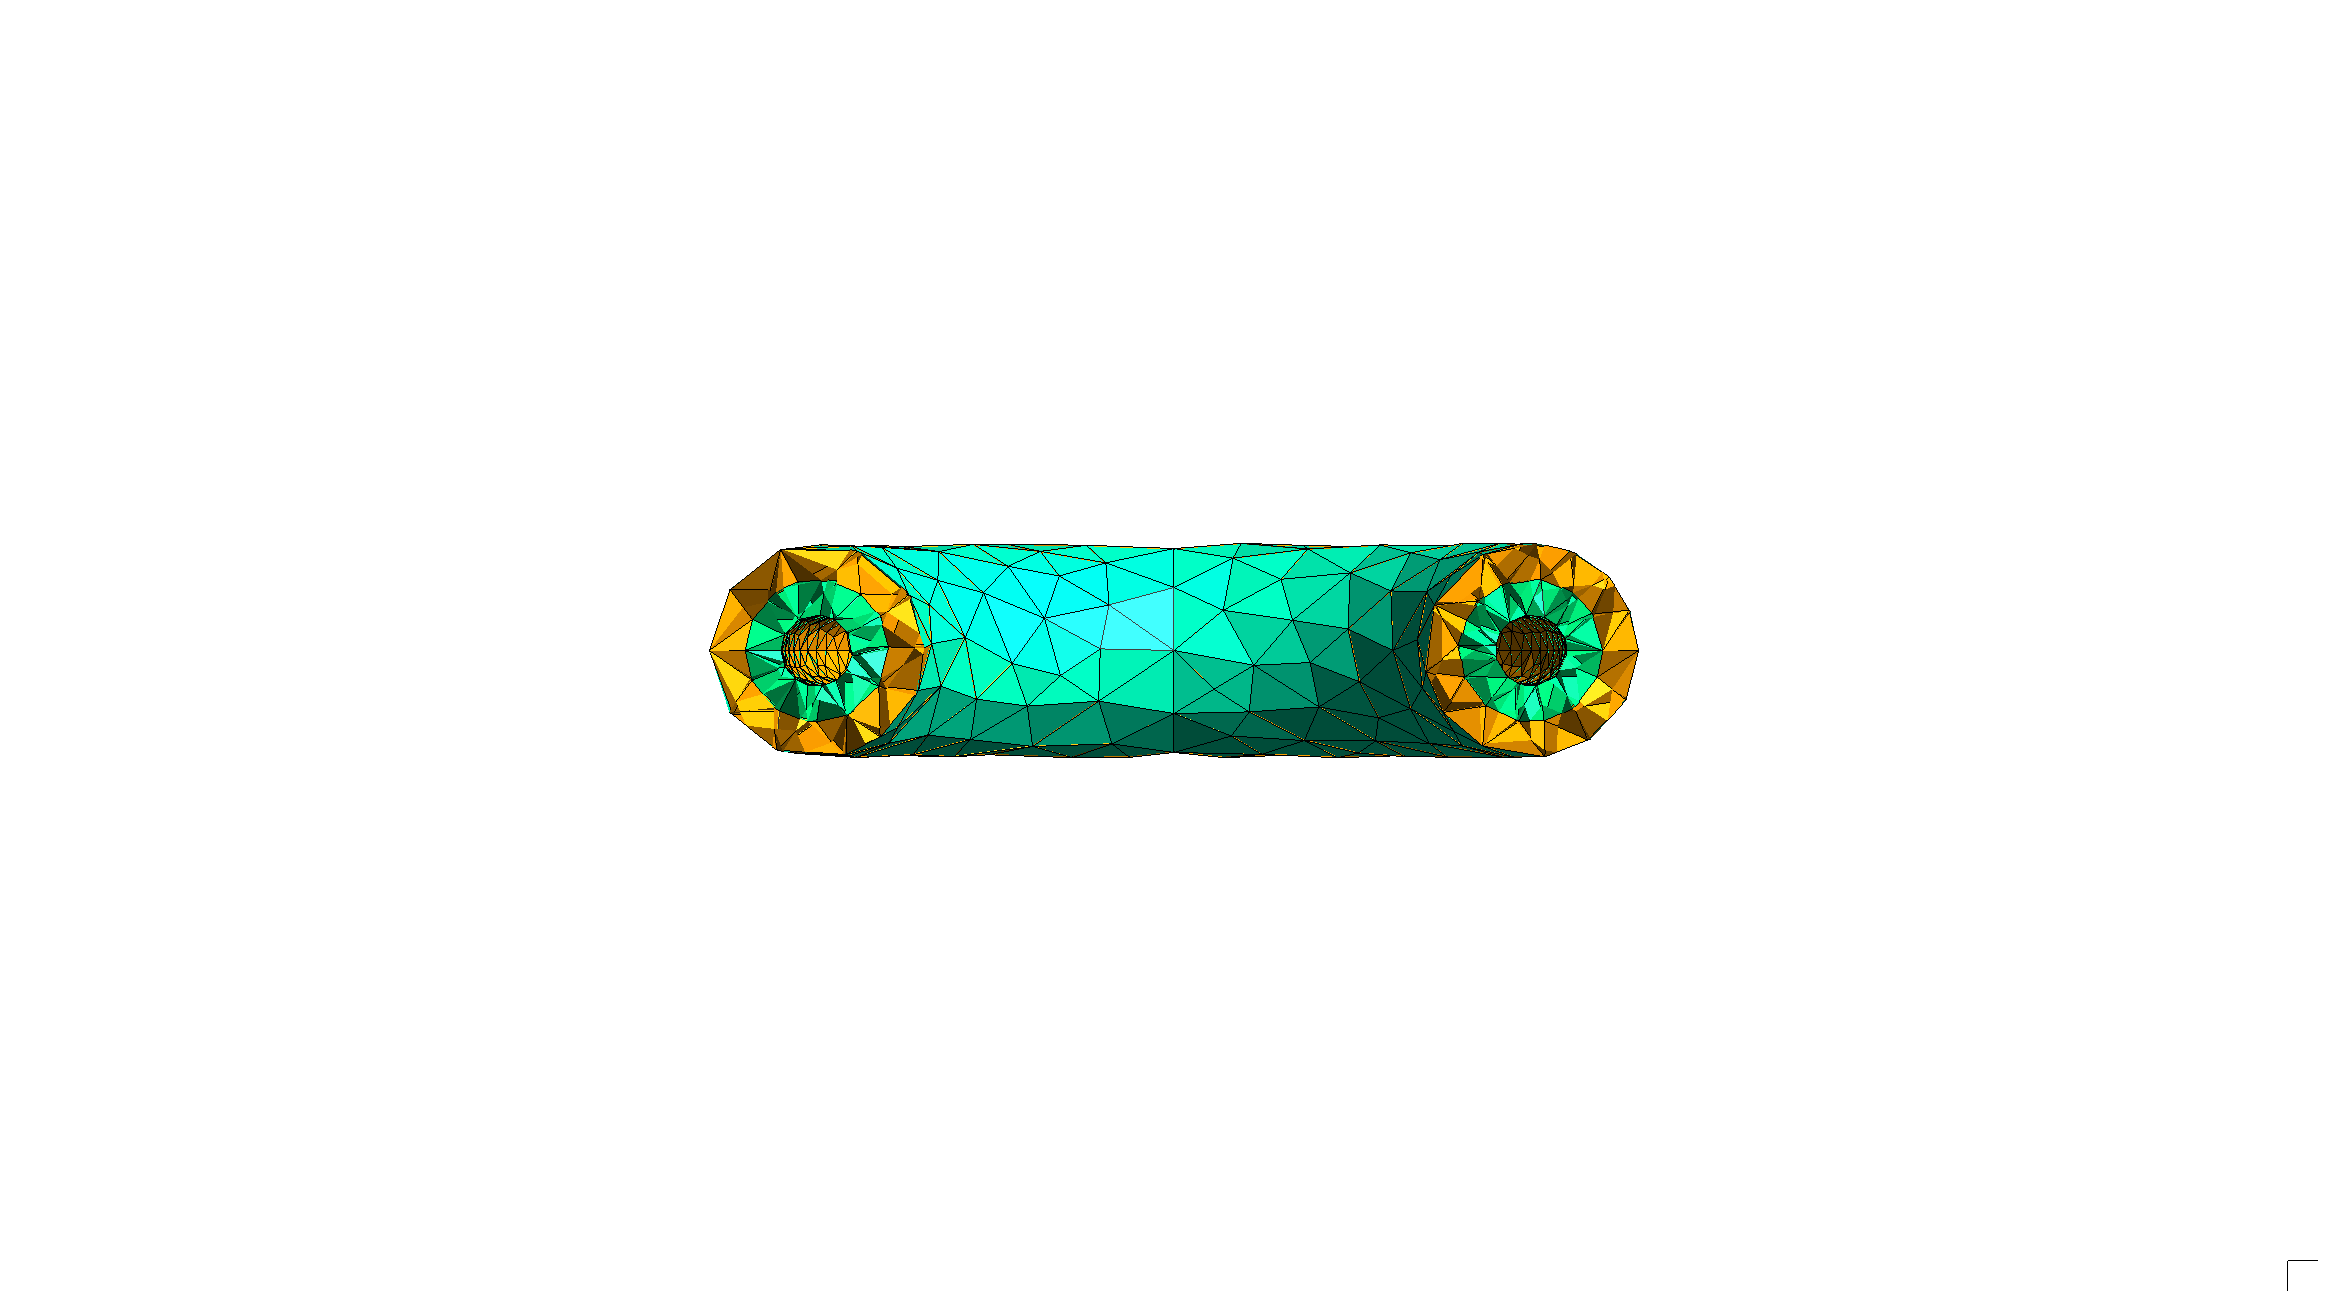

In [5]:
geometry = build_torus_geometry()
options = sm.GmshVolumeOptions(curvature_target=10)
mesh = sm.VolumeMesh.from_geometry(geometry, options)
render_mesh(mesh)

We can select from a number of surface and volume meshing algorithms with the [algorithm2d and algorithm3d](../../api/generated/stellarmesh.GmshVolumeOptions.rst) parameters.

X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


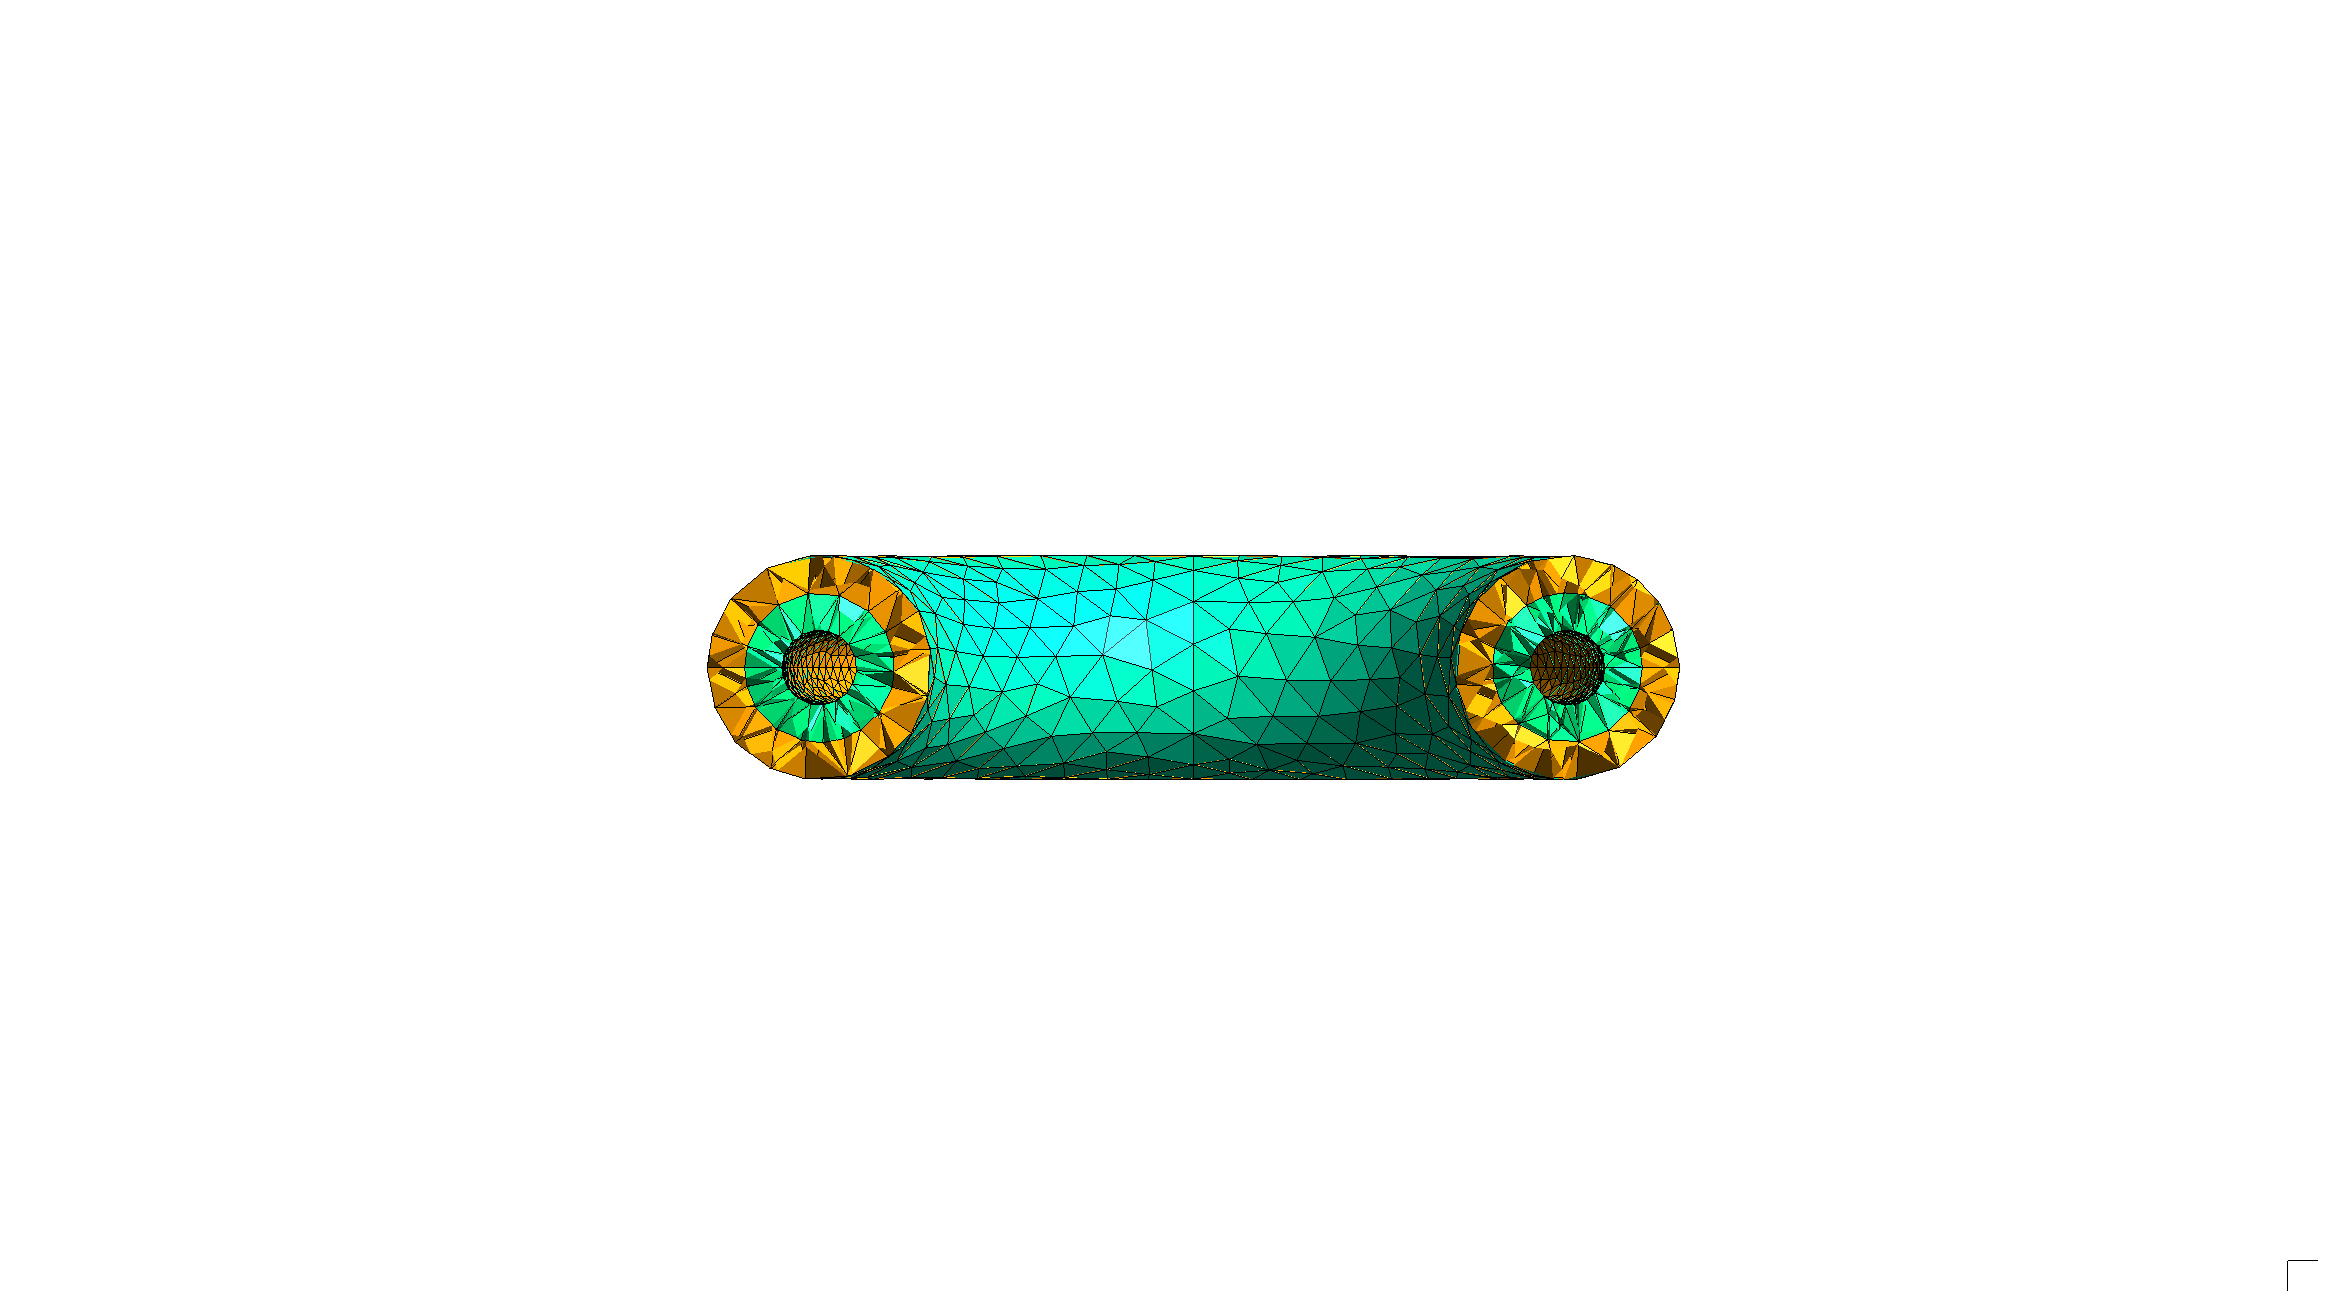

In [6]:
geometry = build_torus_geometry()
options = sm.GmshVolumeOptions(
    curvature_target=15,
    algorithm2d=sm.GmshSurfaceAlgo.MESH_ADAPT,
    algorithm3d=sm.GmshVolumeAlgo.FRONTAL,
)
mesh = sm.VolumeMesh.from_geometry(geometry, options)
render_mesh(mesh)

## MOAB and LibMesh export

Unstructured volume meshes can be exported for analysis in OpenMC or elsewhere using both MOAB and LibMesh EXODUS files.

In [8]:
# MOAB export
sm.MOABModel.from_mesh(mesh).write("torus3d.h5m")

# EXODUS export
mesh.write("torus3d.exo", use_meshio=True)